# Import des librairies



In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Import du dataset

In [2]:
#Charger le csv
df = pd.read_csv("../datasets_source/features_compilation_ml.csv")

In [3]:
for col in ["classe", "SYM"]:
    if col in df.columns:
        df = df.drop(columns=[col])

df.head()

label  bert_wp_len  bert_ids_len  bert_words_len  nb_mots  longueur  len  \
0      0           10            12              10        7        43   43   
1      1            8            10               7        6        46   46   
2      0           18            20              18       13        65   65   
3      0           12            14              12       11        58   58   
4      0           15            17              15       13        52   52   

   frequency_uppercase  n_stopwords  stopwords_ratio  ...  punct_)_ratio  \
0             0.023256            4         0.400000  ...            0.0   
1             0.021739            2         0.285714  ...            0.0   
2             0.030769           11         0.611111  ...            0.0   
3             0.017241            5         0.416667  ...            0.0   
4             0.019231            9         0.600000  ...            0.0   

   connective_addition_ratio  connective_contrast_ratio  \
0                   0.000000                        0.0   
1                   0.000000                        0.0   
2                   0.000000                        0.0   
3                   0.090909                        0.0   
4                   0.076923                        0.0   

   connective_cause_ratio  connective_consequence_ratio  \
0                     0.0                           0.0   
1                     0.0                           0.0   
2                     0.0                           0.0   
3                     0.0                           0.0   
4                     0.0                           0.0   

   connective_concession_ratio  connective_example_ratio  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   

   connective_purpose_ratio  connective_time_ratio  connective_summary_ratio  
0                  0.000000                    0.0                       0.0  
1                  0.000000                    0.0                       0.0  
2                  0.000000                    0.0                       0.0  
3                  0.000000                    0.0                       0.0  
4                  0.076923                    0.0                       0.0  

[5 rows x 57 columns]

# Preprocessing

In [4]:
#Variable cible
target = "label"

#Liste des features
features = [col for col in df.columns if col != target]

#S√©paration variable / features
X = df[features]
Y = df[target]

#Couper en train et test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Sauvegarder les noms des colonnes
feature_names = X_train.columns.tolist()

#Remplir les cases vides
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#Standardiser les donn√©es
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Test des mod√®les

In [5]:
# Instanciation des mod√®les
rf = RandomForestClassifier(random_state=42)
svc = SVC(kernel='linear', probability=True, random_state=42)  # kernel lin√©aire pour avoir coef. pour features imp.
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entra√Ænement des mod√®les
rf.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
xgb.fit(X_train, Y_train)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [6]:
def run_model_pipeline(name, model, X_train, Y_train, X_test, Y_test, store_results=True):
    # Entra√Ænement
    model.fit(X_train, Y_train)

    # Pr√©dictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Scores
    acc_train = accuracy_score(Y_train, y_train_pred)
    acc_test = accuracy_score(Y_test, y_test_pred)
    prec = precision_score(Y_test, y_test_pred)
    rec = recall_score(Y_test, y_test_pred)
    f1 = f1_score(Y_test, y_test_pred)

    # Stocker les r√©sultats dans un dict
    results = {
        "Model": name,
        "Train Accuracy": round(acc_train, 3),
        "Test Accuracy": round(acc_test, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-score": round(f1, 3),
        "y_test_pred": y_test_pred  # garder les pr√©dictions pour la matrice plus tard
    }

    return results


R√©sum√© des r√©sultats des models test√©s:


Model  Train Accuracy  Test Accuracy  Precision  Recall  \
0  Logistic Regression           0.863          0.858      0.885   0.894   
1        Random Forest           1.000          0.952      0.962   0.963   
2                  SVM           0.875          0.871      0.891   0.908   
3              XGBoost           0.999          0.953      0.966   0.960   

   F1-score  
0     0.889  
1     0.962  
2     0.899  
3     0.963




                    ***************************



D√©tail des matrices:


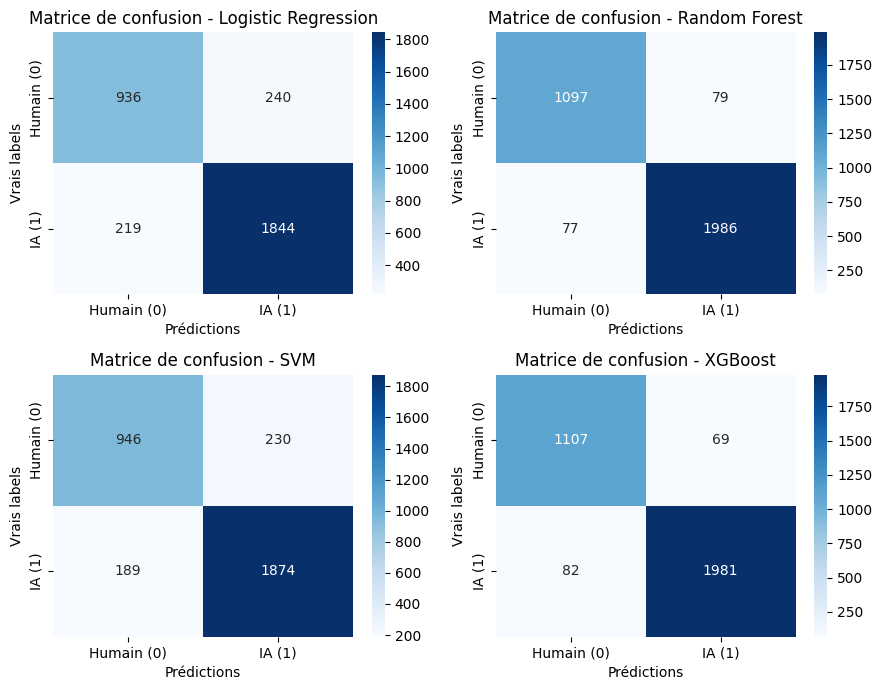

In [7]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "SVM": svc,
    "XGBoost": xgb
}

results_summary = []

for name, model in models.items():
    res = run_model_pipeline(name, model, X_train, Y_train, X_test, Y_test)
    results_summary.append(res)

# Afficher le tableau r√©sum√©
print("R√©sum√© des r√©sultats des models test√©s:")
summary_df = pd.DataFrame(results_summary).drop(columns=["y_test_pred"])
display(summary_df)

print ()
print ()
print ()
print ("                    ***************************")
print ()
print ()
print ()

# Afficher ensuite les matrices de confusion
print("D√©tail des matrices:")
fig, axes = plt.subplots(2, 2, figsize=(9, 7))  # taille plus compacte

for ax, res in zip(axes.flatten(), results_summary):
    cm = confusion_matrix(Y_test, res["y_test_pred"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Humain (0)", "IA (1)"],
                yticklabels=["Humain (0)", "IA (1)"],
                ax=ax)
    ax.set_title(f"Matrice de confusion - {res['Model']}")
    ax.set_xlabel("Pr√©dictions")
    ax.set_ylabel("Vrais labels")

plt.tight_layout()
plt.show()

Analyse mod√®le par mod√®le
1. Logistic Regression
- Performances tr√®s correctes et √©quilibr√©es.
- Pas d‚Äôoverfitting (train = 0.931 vs test = 0.902).
Rien qu'avec un modele tres simple, les resultats sont tres satisfaisants
2. Random Forest
Accuracy sur le train a 1, ce qui indique un sur-apprentissage possible.
Malgr√© cela, les r√©sultats test restent bons (F1-score a 0.953).
L'overfitting reste un point d'attention et nous conforte a choisir un autre modele.

3. SVM
Stable, pas d‚Äôoverfitting (train = 0.932 vs test = 0.905).
Performances proches de Logistic Regression, et nettement en deca du Random Forest.

4. XGBoost
Meilleur mod√®le sur toutes les m√©triques :
Pr√©cision : 0.952
Rappel : 0.985 ‚Üí tr√®s bon pour minimiser les faux n√©gatifs
F1-score : 0.968
Train Accuracy = 1.000 : il apprend parfaitement les donn√©es d'entra√Ænement.
Meilleur choix actuel, mais √† surveiller en cas de mise √† jour du dataset ou changement de distribution des donn√©es. L'ideal serait de baisser l'ecart entre l'accuracy de test et de train.

# Conclusion

Les mod√®les ont un f1_score autour de 0.95, ce qui indique un tr√®s bon √©quilibre entre pr√©cision et rappel :
L‚Äô√©cart train-test a ete reduit (‚âà 0.024 √† 0.027), ce qui signifie que :
Le mod√®le n‚Äôest pas trop surentra√Æn√©, c'est l'objectif de la boucle precedente.

# Feature importance

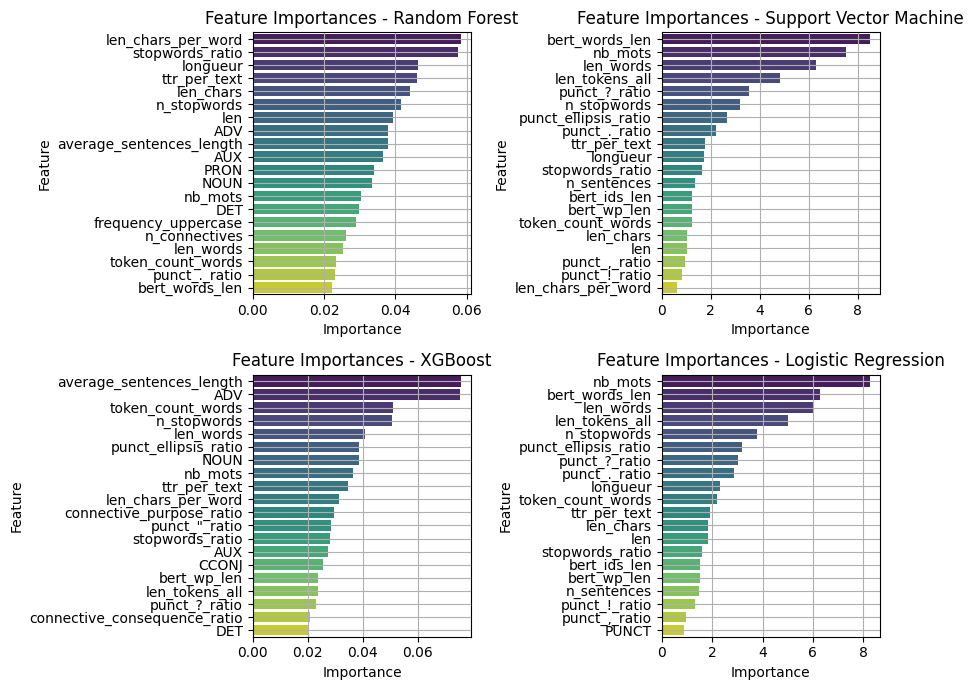

In [8]:
models = [
    ("Random Forest", rf),
    ("Support Vector Machine", svc),
    ("XGBoost", xgb),
    ("Logistic Regression", log_reg)
]

feature_names = features  # noms des features

fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models):
    if name in ["Random Forest", "XGBoost"]:
        importances = model.feature_importances_
    elif name in ["Logistic Regression", "Support Vector Machine"]:
        if hasattr(model, "coef_"):
            importances = np.abs(model.coef_[0])
        else:
            importances = np.zeros(len(feature_names))
            print(f"Pas d'importances pour {name}")
    else:
        importances = np.zeros(len(feature_names))

    imp_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False).head(20)

    sns.barplot(x="Importance", y="Feature", data=imp_df, ax=ax, palette="viridis")
    ax.set_title(f"Feature Importances - {name}")
    ax.grid(True)

plt.tight_layout()
plt.show()


## Conclusion

Les quatres mod√®les montrent deja de super-performance, en particulier XGboost

# Fonction de fine-tuning

## Faire baisser l'overfitting sur XGBoost

In [9]:
#Param√®tres de base
fixed_params = {
    'learning_rate': 0.3,
    "n_estimators": 300,
    "random_state": 42
  }

#Param√®tres √† tester
"""param_grid = {
    "max_depth": [3],
    "min_child_weight": [5, 20],
    "subsample": [0.7, 1.0],
    "gamma": [0, 5]
}
"""
param_grid = {
    "max_depth": [3, 4, 5],
    "min_child_weight": [5, 10, 15, 20],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 1, 2, 5]
}

resultats = []

#G√©n√©rer les combinaisons
keys = param_grid.keys()
values = param_grid.values()

for combination in product(*values):
  params = dict(zip(keys, combination))
  params.update(fixed_params)

  #Entr√¢iner le mod√®le
  xgb = XGBClassifier(**params)
  xgb.fit(X_train, Y_train)

  #Pr√©dictions
  y_train_pred = xgb.predict(X_train)
  y_test_pred = xgb.predict(X_test)

  #Calcule des m√©triques
  train_acc = accuracy_score(Y_train, y_train_pred)
  test_acc = accuracy_score(Y_test, y_test_pred)

  resultats.append({
      "max_depth": params["max_depth"],
      'min_child_weight': params['min_child_weight'],
      'subsample': params['subsample'],
      'gamma': params['gamma'],
      'train_accuracy': train_acc,
      'test_accuracy': test_acc,
      'diff_train_test': train_acc - test_acc,
      'precision': precision_score(Y_test, y_test_pred),
      'recall': recall_score(Y_test, y_test_pred),
      'f1_score': f1_score(Y_test, y_test_pred)
  })

#Cr√©er un dataframe et trier par plus petit overfitting
df_results = pd.DataFrame(resultats)
df_results = df_results.sort_values("diff_train_test")

In [10]:
df_results.head()

max_depth  min_child_weight  subsample  gamma  train_accuracy  \
63           3                20        1.0      5        0.935310   
111          4                15        1.0      5        0.941562   
31           3                10        1.0      5        0.940096   
123          4                20        0.9      5        0.943647   
127          4                20        1.0      5        0.937471   

     test_accuracy  diff_train_test  precision    recall  f1_score  
63        0.929608         0.005702   0.951303  0.937470  0.944336  
111       0.934548         0.007015   0.958395  0.937954  0.948065  
31        0.933004         0.007092   0.956028  0.937954  0.946905  
123       0.936400         0.007247   0.953148  0.946680  0.949903  
127       0.929299         0.008172   0.949951  0.938439  0.944160

## Boucle de recherche des meilleurs parametres sur les autres modeles

In [11]:
def get_best_model(name, model, param_grid, X_train, Y_train, X_test, Y_test):
    print(f"üîç Fine-tuning: {name}")

    gridsearch = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

    gridsearch.fit(X_train, Y_train)
    best_model = gridsearch.best_estimator_

    print(f"‚úÖ Meilleurs param√®tres pour {name} : {gridsearch.best_params_}")

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    results = {
        "Model": name,
        "Train Accuracy": round(accuracy_score(Y_train, y_train_pred), 3),
        "Test Accuracy": round(accuracy_score(Y_test, y_test_pred), 3),
        "Precision": round(precision_score(Y_test, y_test_pred), 3),
        "Recall": round(recall_score(Y_test, y_test_pred), 3),
        "F1-score": round(f1_score(Y_test, y_test_pred), 3),
        "y_test_pred": y_test_pred,
        "best_model": best_model
    }

    return results


In [12]:
# 1. Trouver l'index du mod√®le XGBoost avec le plus faible overfitting
best_idx = df_results['diff_train_test'].abs().idxmin()
best_xgb_row = df_results.loc[best_idx]

best_xgb_params = {
    "max_depth": int(best_xgb_row["max_depth"]),
    "min_child_weight": int(best_xgb_row["min_child_weight"]),
    "subsample": float(best_xgb_row["subsample"]),
    "gamma": float(best_xgb_row["gamma"]),
    "learning_rate": fixed_params["learning_rate"],
    "n_estimators": fixed_params["n_estimators"],
    "random_state": fixed_params["random_state"]
}

best_xgb_model = XGBClassifier(**best_xgb_params)
best_xgb_model.fit(X_train, Y_train)

y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

best_xgb_result = {
    "Model": "XGBoost (min overfitting)",
    "Train Accuracy": round(accuracy_score(Y_train, y_train_pred), 3),
    "Test Accuracy": round(accuracy_score(Y_test, y_test_pred), 3),
    "Precision": round(precision_score(Y_test, y_test_pred), 3),
    "Recall": round(recall_score(Y_test, y_test_pred), 3),
    "F1-score": round(f1_score(Y_test, y_test_pred), 3),
    "y_test_pred": y_test_pred,
    "best_model": best_xgb_model
}

# 2. Pr√©parer les autres mod√®les (sans XGBoost)
models_params = {
    "Logistic Regression": (log_reg, param_grid_log_reg),
    "Random Forest": (rf, param_grid_rf),
    "SVM": (svc, param_grid_svc),
}

finetuned_results = []

# 3. Fine-tuning des autres mod√®les
for name, (model, params) in models_params.items():
    res = get_best_model(name, model, params, X_train, Y_train, X_test, Y_test)
    finetuned_results.append(res)

# 4. Ajouter XGBoost optimis√© manuellement
finetuned_results.append(best_xgb_result)


NameError: name 'param_grid_log_reg' is not defined

üîç Fine-tuning: Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
‚úÖ Meilleurs param√®tres pour Logistic Regression : {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
üîç Fine-tuning: Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
‚úÖ Meilleurs param√®tres pour Random Forest : {'max_depth': None, 'n_estimators': 100}
üîç Fine-tuning: SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
‚úÖ Meilleurs param√®tres pour SVM : {'C': 1, 'kernel': 'rbf'}
üìä R√©sum√© des r√©sultats des mod√®les test√©s :


Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression           0.934          0.902      0.882   
1              Random Forest           1.000          0.953      0.941   
2                        SVM           0.976          0.945      0.941   
3  XGBoost (min overfitting)           0.974          0.950      0.937   

   Recall  F1-score  
0   0.930     0.905  
1   0.965     0.953  
2   0.950     0.945  
3   0.965     0.951


üìâ Matrices de confusion apr√®s fine-tuning :


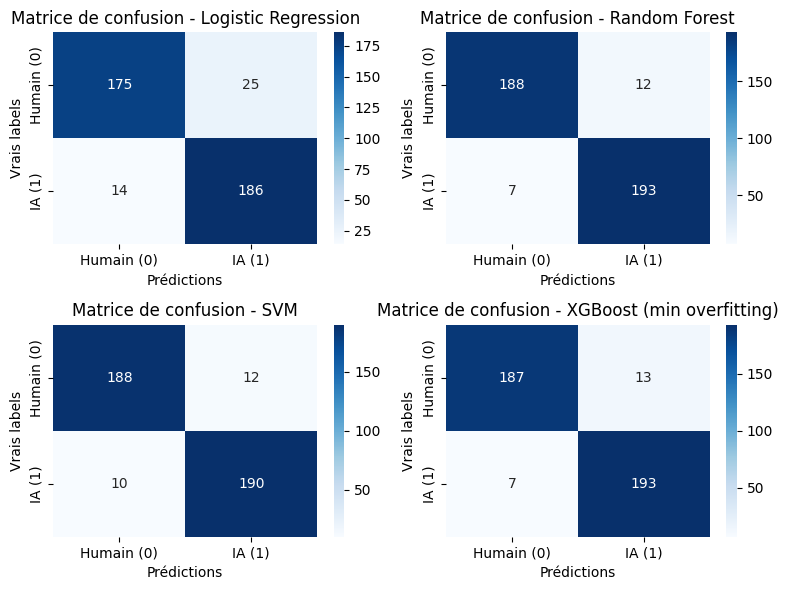

In [ ]:
# 3. Grilles des autres mod√®les
param_grid_log_reg = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

models_params = {
    "Logistic Regression": (log_reg, param_grid_log_reg),
    "Random Forest": (rf, param_grid_rf),
    "SVM": (svc, param_grid_svc),
}

# 4. Fine-tuning des autres mod√®les
finetuned_results = []

for name, (model, params) in models_params.items():
    res = get_best_model(name, model, params, X_train, Y_train, X_test, Y_test)
    finetuned_results.append(res)

# 5. Ajouter manuellement XGBoost optimis√©
finetuned_results.append(best_xgb_result)

# 6. Afficher r√©sum√© des r√©sultats (sans y_test_pred)
summary_df = pd.DataFrame(finetuned_results).drop(columns=["y_test_pred", "best_model"])
print("üìä R√©sum√© des r√©sultats des mod√®les test√©s :")
display(summary_df)

# 7. Afficher matrices de confusion
print("\nüìâ Matrices de confusion apr√®s fine-tuning :")
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for ax, res in zip(axes.flatten(), finetuned_results):
    cm = confusion_matrix(Y_test, res["y_test_pred"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Humain (0)", "IA (1)"],
                yticklabels=["Humain (0)", "IA (1)"],
                ax=ax)
    ax.set_title(f"Matrice de confusion - {res['Model']}")
    ax.set_xlabel("Pr√©dictions")
    ax.set_ylabel("Vrais labels")

plt.tight_layout()
plt.show()

In [ ]:
"""
# Exemple de dict avec mod√®les + grilles (√† adapter)
models_params = {
    "Logistic Regression": (log_reg, param_grid_log_reg),
    "Random Forest": (rf, param_grid_rf),
    "SVM": (svc, param_grid_svc),
    "XGBoost": (xgb, param_grid_xgb)
}

finetuned_results = []

for name, (model, params) in models_params.items():
    res = get_best_model(name, model, params, X_train, Y_train, X_test, Y_test)
    finetuned_results.append(res)
"""

'\n# Exemple de dict avec mod√®les + grilles (√† adapter)\nmodels_params = {\n    "Logistic Regression": (log_reg, param_grid_log_reg),\n    "Random Forest": (rf, param_grid_rf),\n    "SVM": (svc, param_grid_svc),\n    "XGBoost": (xgb, param_grid_xgb)\n}\n\nfinetuned_results = []\n\nfor name, (model, params) in models_params.items():\n    res = get_best_model(name, model, params, X_train, Y_train, X_test, Y_test)\n    finetuned_results.append(res)\n'

# Voting & Stacking


üîß Optimisation pour : Voting
üîç Fine-tuning (Ensemble) : Voting
Fitting 5 folds for each of 14 candidates, totalling 70 fits
‚úÖ Meilleurs param√®tres pour Voting : {'voting': 'hard', 'weights': [1, 2, 1]}

üîß Optimisation pour : Stacking
üîç Fine-tuning (Ensemble) : Stacking
Fitting 5 folds for each of 8 candidates, totalling 40 fits
‚úÖ Meilleurs param√®tres pour Stacking : {'cv': 10, 'final_estimator': RandomForestClassifier(), 'passthrough': True}


Model  Train Accuracy  Test Accuracy  Precision  Recall  F1-score
0    Voting           0.992          0.950      0.941   0.960     0.950
1  Stacking           0.996          0.963      0.951   0.975     0.963

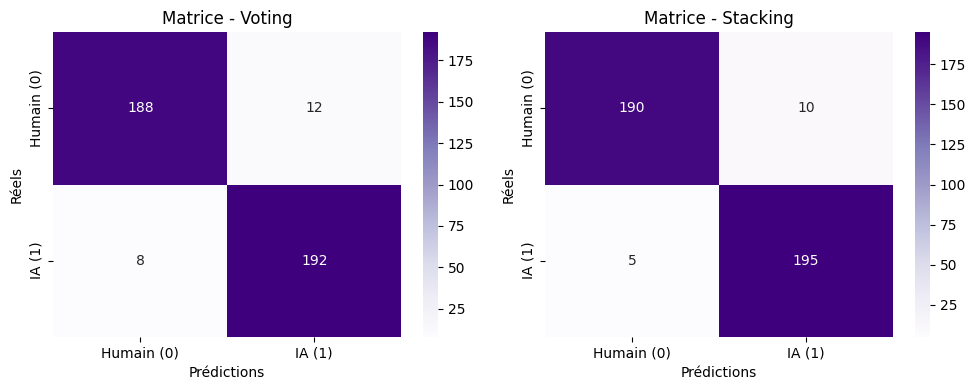

In [ ]:
# --- D√©finition des grilles et mod√®les √† tester ---
base_models = {
    "lr": finetuned_results[0]["best_model"],
    "rf": finetuned_results[1]["best_model"],
    "xgb": finetuned_results[3]["best_model"]
}

def get_best_ensemble_model(name, model, param_grid, X_train, Y_train, X_test, Y_test):
    print(f"üîç Fine-tuning (Ensemble) : {name}")

    gridsearch = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
    gridsearch.fit(X_train, Y_train)
    best_model = gridsearch.best_estimator_

    print(f"‚úÖ Meilleurs param√®tres pour {name} : {gridsearch.best_params_}")

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    results = {
        "Model": name,
        "Train Accuracy": round(accuracy_score(Y_train, y_train_pred), 3),
        "Test Accuracy": round(accuracy_score(Y_test, y_test_pred), 3),
        "Precision": round(precision_score(Y_test, y_test_pred), 3),
        "Recall": round(recall_score(Y_test, y_test_pred), 3),
        "F1-score": round(f1_score(Y_test, y_test_pred), 3),
        "y_test_pred": y_test_pred,
        "best_model": best_model
    }

    return results

ensemble_configs = [
    {
        "name": "Voting",
        "model_class": VotingClassifier,
        "param_grid": {
            "voting": ["soft", "hard"],
            "weights": [
                [1, 1, 1],
                [2, 1, 1],
                [1, 2, 1],
                [1, 1, 2],
                [1, 2, 2],
                [2, 1, 2],
                [2, 2, 1]
            ]
        },
        "estimators": [
            ("lr", base_models["lr"]),
            ("rf", base_models["rf"]),
            ("xgb", base_models["xgb"])
        ]
    },
    {
        "name": "Stacking",
        "model_class": StackingClassifier,
        "param_grid": {
            "final_estimator": [
                LogisticRegression(max_iter=5000),
                RandomForestClassifier(n_estimators=100)
            ],
            "passthrough": [True, False],
            "cv": [5, 10]
        },
        "estimators": [
            ("lr", base_models["lr"]),
            ("xgb", base_models["xgb"])
        ]
    }
]

ensemble_results = []

for config in ensemble_configs:
    print(f"\nüîß Optimisation pour : {config['name']}")

    # Instancier le mod√®le avec ses estimators de base
    model = config["model_class"](estimators=config["estimators"])

    # Optimisation via GridSearch
    result = get_best_ensemble_model(
        name=config["name"],
        model=model,
        param_grid=config["param_grid"],
        X_train=X_train,
        Y_train=Y_train,
        X_test=X_test,
        Y_test=Y_test
    )

    ensemble_results.append(result)

# R√©sum√© des mod√®les d'ensemble
ensemble_summary = pd.DataFrame(ensemble_results).drop(columns=["y_test_pred", "best_model"])
display(ensemble_summary)

# Matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, res in zip(axes, ensemble_results):
    cm = confusion_matrix(Y_test, res["y_test_pred"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=["Humain (0)", "IA (1)"],
                yticklabels=["Humain (0)", "IA (1)"],
                ax=ax)
    ax.set_title(f"Matrice - {res['Model']}")
    ax.set_xlabel("Pr√©dictions")
    ax.set_ylabel("R√©els")

plt.tight_layout()
plt.show()

Ces r√©sultats montrent que les mod√®les d'ensemble, obtiennent d‚Äôexcellentes performances avec une tr√®s bonne pr√©cision, rappel et F1-score, tout en maintenant une faible diff√©rence entre l‚Äôaccuracy train et test, ce qui indique un bon √©quilibre entre biais et variance. L‚Äôint√©r√™t principal de ces approches est qu‚Äôelles combinent la force de plusieurs mod√®les, r√©duisent le risque de surapprentissage propre √† un mod√®le unique, et am√©liorent la robustesse et la g√©n√©ralisation des pr√©dictions.

In [ ]:
# Convertir les r√©sultats d'ensemble en DataFrame
ensemble_df = pd.DataFrame(ensemble_results).drop(columns=["y_test_pred", "best_model"]).copy()

# Ajouter une colonne pour diff√©rencier les mod√®les d'ensemble
ensemble_df["Model"] = ensemble_df["Model"] + " (Ensemble)"

# Combiner avec le r√©sum√© fine-tuning classique
final_summary = pd.concat([summary_after, ensemble_df], ignore_index=True)

# Arrondir les colonnes num√©riques √† 3 d√©cimales
metrics = ["Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1-score"]
final_summary[metrics] = final_summary[metrics].round(3)

# Trier par F1-score d√©croissant
summary_after_sorted = final_summary.sort_values(by="F1-score", ascending=False).reset_index(drop=True)

print("üìä R√©sultats apr√®s fine-tuning et mod√®les d'ensemble (tri√©s par F1-score) :")

# Appliquer le style pour mettre en vert les max de chaque colonne (sauf la colonne 'Model')
styled_df = summary_after_sorted.style\
    .format({col: "{:.3f}" for col in metrics})\
    .highlight_max(axis=0, subset=metrics, color='blue')

display(styled_df)

üìä R√©sultats apr√®s fine-tuning et mod√®les d'ensemble (tri√©s par F1-score) :


# Enregistrement des meilleurs models

In [ ]:
"""
============On enregistre sur mlflow, l√† √ßa ne nous sert pas ?==============
df_models = pd.DataFrame(summary_df)

import joblib

for res in finetuned_results:
    joblib.dump(res["best_model"], f"{res['Model'].replace(' ', '_')}_best_model.pkl")"""


# Tester sur un nouveau dataset

In [ ]:
#Charger le csv
df_2 = pd.read_csv("../datasets_source/features_ia_vs_humain_ml - DATASET-TEST.csv") #nom √† revoir

# Test des models:

## Test du meilleur model

Meilleur mod√®le s√©lectionn√© : Stacking (Ensemble)
 Meilleur mod√®le identifi√© : Stacking (Ensemble)

üìä R√©sultats du meilleur mod√®le sur df_2 :
Model      : Stacking (Ensemble)
Accuracy   : 0.978
Precision  : 0.976
Recall     : 0.98
F1-score   : 0.978


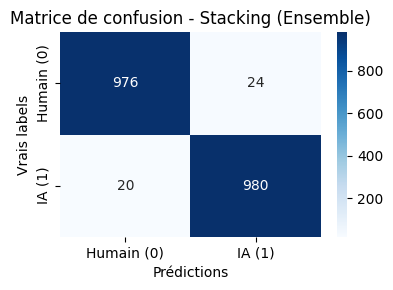

In [ ]:
# 1. Trouver le nom du meilleur mod√®le selon le F1-score
best_model_name = summary_after_sorted.iloc[0]["Model"]
print(f"Meilleur mod√®le s√©lectionn√© : {best_model_name}")
# √âtape 2 ‚Äî Cr√©er un dictionnaire √† partir de ta liste models pour retrouver l‚Äôobjet du mod√®le

models_dict = dict(models)

# Ajouter les mod√®les d'ensemble
for res in ensemble_results:
    name = res["Model"] + " (Ensemble)"
    models_dict[name] = res["best_model"]

# --- 2. Identifier le meilleur mod√®le (le premier de ton tableau tri√©) ---

best_model_name = summary_after_sorted.iloc[0]["Model"]
print(f" Meilleur mod√®le identifi√© : {best_model_name}")

best_model = models_dict[best_model_name]


# --- 3. Pr√©paration des donn√©es df_2 ---

target = "label"
features = [col for col in df_2.columns if col != target]

X_2 = df_2[features]
Y_2 = df_2[target]

# Appliquer le m√™me pr√©traitement qu'en entra√Ænement
X_2 = X_2[imputer.feature_names_in_]
X_2 = imputer.transform(X_2)
X_2 = scaler.transform(X_2)

# --- 4. Pr√©dictions et m√©triques ---

y_pred = best_model.predict(X_2)

acc = round(accuracy_score(Y_2, y_pred), 3)
prec = round(precision_score(Y_2, y_pred), 3)
rec = round(recall_score(Y_2, y_pred), 3)
f1 = round(f1_score(Y_2, y_pred), 3)

# --- 5. Affichage des r√©sultats ---

print("\nüìä R√©sultats du meilleur mod√®le sur df_2 :")
print(f"Model      : {best_model_name}")
print(f"Accuracy   : {acc}")
print(f"Precision  : {prec}")
print(f"Recall     : {rec}")
print(f"F1-score   : {f1}")

# --- 6. Matrice de confusion ---

cm = confusion_matrix(Y_2, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Humain (0)", "IA (1)"],
            yticklabels=["Humain (0)", "IA (1)"])
plt.title(f"Matrice de confusion - {best_model_name}")
plt.xlabel("Pr√©dictions")
plt.ylabel("Vrais labels")
plt.tight_layout()
plt.show()

## test de tous les models sur df_2

In [ ]:
# --- 1. Regrouper tous les mod√®les dans un dictionnaire ---

models_dict = dict(models)  # mod√®les classiques
for res in ensemble_results:  # mod√®les d'ensemble
    models_dict[res["Model"] + " (Ensemble)"] = res["best_model"]

# --- 2. Pr√©parer les donn√©es de df_2 ---

target = "label"
features = [col for col in df_2.columns if col != target]

X_2 = df_2[features]
Y_2 = df_2[target]

X_2 = X_2[imputer.feature_names_in_]
X_2 = imputer.transform(X_2)
X_2 = scaler.transform(X_2)

# --- 3. √âvaluer tous les mod√®les sur df_2 ---

results_2 = []

for name, model in models_dict.items():
    y_pred = model.predict(X_2)

    results_2.append({
        "Model": name,
        "Accuracy": round(accuracy_score(Y_2, y_pred), 3),
        "Precision": round(precision_score(Y_2, y_pred), 3),
        "Recall": round(recall_score(Y_2, y_pred), 3),
        "F1-score": round(f1_score(Y_2, y_pred), 3)
    })

# --- 4. Affichage du tableau tri√© par F1-score ---

results_df_2 = pd.DataFrame(results_2)
results_df_2 = results_df_2.sort_values(by="F1-score", ascending=False).reset_index(drop=True)

# Mettre en valeur les meilleurs scores par colonne
styled_results_df_2 = results_df_2.style\
    .format({col: "{:.3f}" for col in ["Accuracy", "Precision", "Recall", "F1-score"]})\
    .highlight_max(axis=0, subset=["Accuracy", "Precision", "Recall", "F1-score"], color='purple')

print("üìä R√©sultats des mod√®les sur le dataset df_2 :")
display(styled_results_df_2)


üìä R√©sultats des mod√®les sur le dataset df_2 :


# Conclusion

XGBoost et Random Forest offrent les meilleures performances, avec pr√®s de 98% d‚Äôaccuracy.
Les mod√®les d‚Äôensemble (Voting, Stacking) restent tr√®s efficaces, l√©g√®rement en retrait.
Logistic Regression et SVM sont moins performants sur ce dataset.